In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pingouin import corr
import dataframe_image as dfi

### Pulling all three DataSets
<p>Renamed all data sets and saved their csv's:</p>
<li>dataset1: World CSV</li>
<li>dataset2: Euro10 CSV</li>
<li>dataset3: EuroAll CSV</li>

In [2]:
ds1 = pd.read_csv('ADmergeVOM.csv')

In [3]:
ds1.head()

,Unnamed: 0,Entity,Year,Vegetable Oil,Deaths
0,0,Afghanistan,2007,3.48,707.188774
1,1,Albania,2007,7.00,339.928986
2,2,Algeria,2007,13.60,328.078554
3,3,Angola,2007,9.05,344.017796
4,4,Argentina,2007,14.60,220.586059


In [4]:
ds1.to_csv('dataset1.csv')

In [5]:
ds2 = pd.read_csv('mergeEuro.csv')

In [6]:
ds2.head()

,Unnamed: 0,Entity,Year,Vegetable Oil,Deaths
0,0,France,2007,507.945205,112.366845
1,1,Germany,2007,451.232877,176.248974
2,2,Italy,2007,673.150685,141.709672
3,3,Netherlands,2007,389.589041,138.289634
4,4,Poland,2007,276.164384,302.017225


In [7]:
ds2.to_csv('dataset2.csv')

In [8]:
ds3 =  pd.read_csv('EuroWVOMR.csv')

In [9]:
ds3

,Unnamed: 0,Entity,Year,Vegetable Oil,Deaths
0,0,Albania,2007,172.602740,339.928986
1,1,Armenia,2007,182.465753,410.791211
2,2,Austria,2007,542.465753,182.027111
3,3,Azerbaijan,2007,71.506849,632.724097
4,4,Belarus,2007,387.123288,533.504417
...,...,...,...,...,...
200,200,Sweden,2011,416.712329,153.603971
201,201,Switzerland,2011,495.616438,114.813790
202,202,Turkey,2011,613.972603,184.849933
203,203,Ukraine,2011,315.616438,546.286540


In [10]:
ds3.to_csv('dataset3.csv')

### Filtering outliers
###### Dataset1

In [11]:
#VO
len(ds1[['Vegetable Oil','Deaths']])

740

In [12]:
ds1['Vegetable Oil'] *= 1000

In [13]:
ds1['Vegetable Oil'] /= 365

In [14]:
ds1['Vegetable Oil'] *= 9

In [15]:
max_threshold = ds1['Vegetable Oil'].quantile(0.95)
max_threshold

559.9726027397259

In [16]:
min_threshold = ds1['Vegetable Oil'].quantile(0.05)
min_threshold

71.97534246575343

In [17]:
ds1 = ds1[(ds1['Vegetable Oil']<max_threshold) & (ds1['Vegetable Oil']>min_threshold)]

In [18]:
#MR
max_threshold = ds1['Deaths'].quantile(0.95)
max_threshold

544.595158512821

In [19]:
min_threshold = ds1['Deaths'].quantile(0.05)
min_threshold

125.31255406465945

In [20]:
ds1 = ds1[(ds1['Deaths']<max_threshold) & (ds1['Deaths']>min_threshold)]

In [21]:
len(ds1)

598

In [22]:
ds1Trim = ds1.drop(columns=['Unnamed: 0'], inplace=True)

In [23]:
ds1Trim = ds1

###### Dataset2

In [24]:
len(ds2[['Vegetable Oil','Deaths']])

50

In [25]:
max_threshold = ds2['Vegetable Oil'].quantile(0.95)
max_threshold

717.5342465753422

In [26]:
min_threshold = ds2['Vegetable Oil'].quantile(0.05)
min_threshold

295.64383561643837

In [27]:
ds2 = ds2[(ds2['Vegetable Oil']<max_threshold) & (ds2['Vegetable Oil']>min_threshold)]

In [28]:
max_threshold = ds2['Deaths'].quantile(0.95)
max_threshold

565.144680208295

In [29]:
min_threshold = ds2['Deaths'].quantile(0.05)
min_threshold

108.21761349857361

In [30]:
ds2 = ds2[(ds2['Deaths']<max_threshold) & (ds2['Deaths']>min_threshold)]

In [31]:
len(ds2)

38

In [32]:
ds2Trim = ds2.drop(columns=['Unnamed: 0'], inplace=True)

In [33]:
ds2Trim = ds2

###### Dataset3

In [34]:
len(ds3[['Vegetable Oil','Deaths']])

205

In [35]:
max_threshold = ds3['Vegetable Oil'].quantile(0.95)
max_threshold

657.8630136986301

In [36]:
min_threshold = ds3['Vegetable Oil'].quantile(0.05)
min_threshold

152.87671232876713

In [37]:
ds3 = ds3[(ds3['Vegetable Oil']<max_threshold) & (ds3['Vegetable Oil']>min_threshold)]

In [38]:
#MR
max_threshold = ds3['Deaths'].quantile(0.95)
max_threshold

536.4335539107747

In [39]:
min_threshold = ds3['Deaths'].quantile(0.05)
min_threshold

129.20907594078224

In [40]:
ds3 = ds3[(ds3['Deaths']<max_threshold) & (ds3['Deaths']>min_threshold)]

In [41]:
len(ds3)

162

In [42]:
ds3Trim = ds3.drop(columns=['Unnamed: 0'], inplace=True)

In [43]:
ds3Trim = ds3

### Saving all tables to CSV

In [44]:
ds1Trim.to_csv('ds1Trim.csv')

In [45]:
ds2Trim.to_csv('ds2Trim.csv')

In [46]:
ds3Trim.to_csv('ds3Trim.csv')

### Plotting just in case

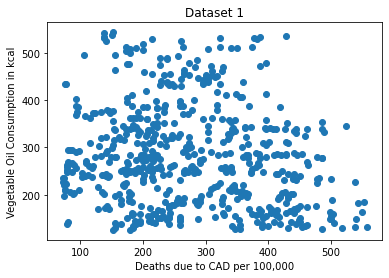

In [47]:
plt.title('Dataset 1')
plt.xlabel('Deaths due to CAD per 100,000')
plt.ylabel('Vegetable Oil Consumption in kcal')
plt.scatter(ds1Trim['Vegetable Oil'], ds1Trim['Deaths'])

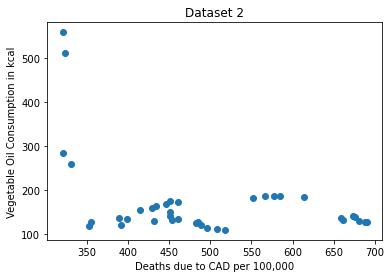

In [48]:
plt.title('Dataset 2')
plt.xlabel('Deaths due to CAD per 100,000')
plt.ylabel('Vegetable Oil Consumption in kcal')
plt.scatter(ds2Trim['Vegetable Oil'], ds2Trim['Deaths'])

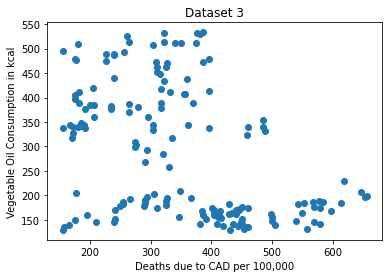

In [49]:
plt.title('Dataset 3')
plt.xlabel('Deaths due to CAD per 100,000')
plt.ylabel('Vegetable Oil Consumption in kcal')
plt.scatter(ds3Trim['Vegetable Oil'], ds3Trim['Deaths'])

### Pearsons Tables

<p>Pearson Correlation varies between -1 and +1. If it is -1 there is a perfect negative lineair relationship, if it is 0 there is no lineair relationship and at +1 there is a perfect positive lineair relationship.

A positive relation means that if one variable goes up, the other also goes up (for example number of ice cream sold versus temperature), a negative relation indicates if one goes down, the other goes up (for example number of winter jackets sold versus temperature).

We can test if Pearson Correlation might be significantly different from 0 in the population. In the example the significance of this test is .000. This is the chance of finding a correlation coefficient of .880 or even higher in a sample, if in the population it would be 0 (no association). This is such a low chance, that we can say that in the population the correlation coefficient will be indeed different from zero, and conclude that there is a significant linear association between the two variables.

To determine the strength we only look at the absolute value (which means to ignore any minus sign, so the absolute value of for example -0.4 is simply 0.4).

Unfortunately there is no formal way to determine if 0.880 is high or low (although almost everyone would agree this is pretty high), and the rules of thumb floating around on the internet vary quite a lot, often depending on the field (e.g. biology, medicine, business, etc.). For example the same rule of thumb sizes from Rea and Parker (1992):</p>
<table>
  <tr>
    <td>|r|</td>
    <td>Strenght</td>
  </tr>
  <tr>
      <td><p>0.00 < 0.10</p></td>
    <td>Negligible</td>
  </tr>
     <tr>
      <td><p>0.10 < 0.20</p></td>
    <td>Weak</td>
  </tr>
     <tr>
      <td><p>0.20 < 0.40</p></td>
    <td>Moderate</td>
  </tr>
     <tr>
      <td><p>0.40 < 0.60</p></td>
    <td>Relatively strong</td>
  </tr>
     <tr>
      <td><p>0.60 < 0.80</p></td>
    <td>Strong</td>
  </tr>
         <tr>
      <td><p>0.80 < 1.00</p></td>
    <td>Very strong</td>
  </tr>
    
</table>

In [50]:
ds1Trim[['Vegetable Oil', 'Deaths']].corr()

,Vegetable Oil,Deaths
Vegetable Oil,1.000000,-0.163823
Deaths,-0.163823,1.000000


In [58]:
dfi.export(corr(ds1Trim['Vegetable Oil'], ds1Trim['Deaths'] ), 'ds1Pearsons.png')

In [52]:
ds2Trim[['Vegetable Oil', 'Deaths']].corr()

,Vegetable Oil,Deaths
Vegetable Oil,1.000000,-0.417375
Deaths,-0.417375,1.000000


In [57]:
dfi.export(corr(ds2Trim['Vegetable Oil'], ds2Trim['Deaths'] ), 'ds2Pearsons.png')

In [54]:
ds3Trim[['Vegetable Oil', 'Deaths']].corr()

,Vegetable Oil,Deaths
Vegetable Oil,1.000000,-0.438487
Deaths,-0.438487,1.000000


In [56]:
dfi.export(corr(ds3Trim['Vegetable Oil'], ds3Trim['Deaths'] ), 'ds3Pearsons.png')